In [70]:

import numpy as np

import matplotlib.pyplot as plt
from PIL import Image ,ImageOps

import albumentations
from albumentations.core.transforms_interface import DualTransform

# from augments.awe import TearAug

In [ ]:
import numpy as np
import albumentations
from albumentations.core.transforms_interface import DualTransform

class TearAug(DualTransform):
    """Tears the input .
    Args:
        apply_color (int or list) : color with which to fill. Default: sky_blue.
        slider (float) : how much portion to cover of the image. Default: 0.25.
        smoothness (float) : smoothness of the tear. Default: 0.4.
        p (float): probability of applying the transform. Default: 0.5.
    Targets:
        image
    Image types:
        uint8, float32
    """
    
    def __init__(self, apply_color = [135,206,235], slider = 0.25, smoothness =0.4, always_apply=False, p=0.5):
        super(TearAug, self).__init__(always_apply, p)
        
        if isinstance(apply_color, int):
            apply_color = [apply_color,apply_color,apply_color]
        self.apply_color = apply_color
        self.slider = slider
        self.smoothness = smoothness
        self.image_size = None
       

    def apply(self, img, **params):
        
        self.image_size = img.shape[1]
        out = img.copy()
        y1 ,y2 = self.get_par()
        
        x,y = self.get_coordinates(y1,y2)
        
        if y2 > y1:
            for i in range(len(x)):
                out[:x[i],y[i]:,:] = self.apply_color
        else :
            for i in range(len(x)):
                out[x[i]:,y[i]:,:] = self.apply_color
        
        return out
    
    def get_par(self):
        toss = np.random.rand()
        if toss > 0.5 : # y1 < y2
            y1 = np.random.randint(0,int(self.image_size*self.slider))
            y2 = np.random.randint(int(self.image_size*(1-self.slider)),self.image_size)
        else :
            y1 = np.random.randint(int(self.image_size*(1-self.slider)),self.image_size)
            y2 = np.random.randint(0,int(self.image_size*self.slider))
        
        return y1,y2

    def get_coordinates(self,y1,y2):
        x = np.arange(self.image_size -1 ,-1,-5)
        linear_part = ((y2 - y1)*x/self.image_size + y1 )
        coeff_sin = np.mean(linear_part)/(self.smoothness*100)
        y = np.array( linear_part + coeff_sin*np.sin(x),dtype = 'int')
        y = y*(y>0)
        return x,y


In [3]:
np.zeros((256,256,3)).shape

(256, 256, 3)

In [9]:
img = Image.open('tf2.jpeg').resize((256,256))

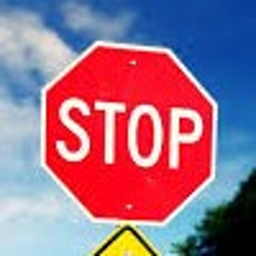

In [10]:
img

In [122]:
mask_base = np.zeros((256,256,3))
inverted_mask_base = np.ones((256,256,3))
bird_base = np.ones((256,256,3))
image_size = 256
mask_size = 256//2
bird_mask = Image.open('crow_mask2.png').resize((mask_size,mask_size)).convert('RGB')
inverted_bird_mask = ImageOps.invert(bird_mask)
bird_image = Image.open('crow_image2.png').resize((mask_size,mask_size)).convert('RGB')

In [123]:
left_cor = np.random.randint(0,image_size-mask_size)
top_cor  = np.random.randint(0,image_size-mask_size)
right_cor = left_cor + mask_size
bottom_cor = top_cor + mask_size

In [124]:
mask_base[left_cor:right_cor,top_cor:bottom_cor,:] = np.array(bird_mask)/255.0
bird_base[left_cor:right_cor,top_cor:bottom_cor,:] = np.array(bird_image)/255.0
inverted_mask_base[left_cor:right_cor,top_cor:bottom_cor,:] = np.array(inverted_bird_mask)/255.0

In [125]:
final_img = img*(inverted_mask_base)/255.0 + mask_base*bird_base

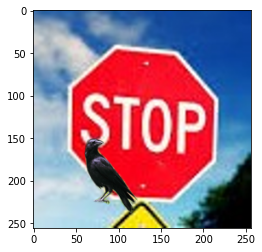

In [126]:
plt.imshow(img*(inverted_mask_base)/255.0 + mask_base*bird_base)

In [ ]:
p1 = np.array(inverted_mask)
p2 = np.array(img_mask)
p1 = (p1==0)*255
p2 = 255*(p2!=255)

im1 = np.array(img_real2)*(p2//255)
im2 = np.array(img_real)*p1 // 255


plt.imshow(im1+im2)

In [67]:
inverted_mask_base = (mask_base >=200 )*255.0

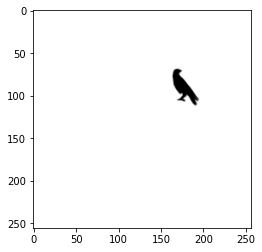

In [75]:
plt.imshow(inverted_mask_base)

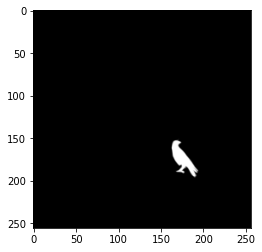

In [50]:
plt.imshow(mask_base)

In [21]:
np.array(bird_mask).shape

(64, 64)

In [ ]:
img_mask = Image.open('./segmentations/059.California_Gull/California_Gull_0025_41479.png').resize((256,256)).convert('RGB')
img_real = Image.open('./CUB_200_2011/images/059.California_Gull/California_Gull_0025_41479.jpg').resize((256,256))
img_real2 = Image.open('./CUB_200_2011/images/059.California_Gull/California_Gull_0123_41330.jpg').resize((256,256))

inverted_mask = ImageOps.invert(img_mask)

p1 = np.array(inverted_mask)
p2 = np.array(img_mask)
p1 = (p1==0)*255
p2 = 255*(p2!=255)

im1 = np.array(img_real2)*(p2//255)
im2 = np.array(img_real)*p1 // 255


plt.imshow(im1+im2)